<a href="https://colab.research.google.com/github/shahnozayadgar/Natural-Gas-Price-Forecasting---Time-Series-Model/blob/main/Henry_Hub_Natural_Gas_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_test.csv to data_test (5).csv
Saving data_train.csv to data_train (5).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


train_df = pd.read_csv('data_train.csv')
test_df = pd.read_csv('data_test.csv')

print(f"training data has: {train_df.shape[0]} rows, {train_df.shape[1]} columns")
print(f"testing data has: {test_df.shape[0]} rows, {test_df.shape[1]} columns")

print("\ncolumn names are:")
print(list(train_df.columns))

training data has: 204 rows, 114 columns
testing data has: 48 rows, 114 columns

column names are:
['date', 'Brent_Crude_Oil', 'WTI_Crude_Oil', 'Electricity_Price_USA', 'Heating_Oil_Price_USA', 'Natural_Gas_Imports_From_Canada_USA', 'Natural_Gas_Imports_USA', 'Natural_Gas_Rotary_Rig_Count_USA', 'Natural_Gas_Total_Consumption_USA', 'Total_Natural_Gas_Marketed_Production_USA', 'Total_Natural_Gas_Underground_Storage_Volume_USA', 'BCOMCL_INDX', 'BCOMGC_INDX', 'BCOMHG_INDX', 'BCOMNG_INDX', 'CSI300_INDX', 'DJI_INDX', 'DXY_INDX', 'GSPC_INDX', 'IXIC_INDX', 'NYA_INDX', 'USDEUR_FOREX', 'XAX_INDX', 'CPI_Energy_Seasonally_Adjusted_USA', 'CPI_Index_Seasonally_Adjusted_USA', 'Fed_Fund_Effective_USA', 'Kilian_Global_Economy_Index_WORLD', 'PPI_Manufacturing_Sector_USA', 'PPI_Mining_Sector_USA', 'CLI_Comp_Bank_Activity_JPN', 'CLI_Comp_Business_Situation_DEU', 'CLI_Comp_Business_Situation_KOR', 'CLI_Comp_Business_Situation_USA', 'CLI_Comp_Cars_Registrations_Or_Sales_GBR', 'CLI_Comp_Cars_Registrations_Or

In [ ]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
print("Date ranges for Henry Hub Natural Gas Prices Prediction Data:")
print(f"Training data: {train_df['date'].min()} to {train_df['date'].max()}")
print(f"Testing data: {test_df['date'].min()} to {test_df['date'].max()}")

Date ranges for Henry Hub Natural Gas Prices Prediction Data:
Training data: 2003-09-30 00:00:00 to 2020-08-31 00:00:00
Testing data: 2020-09-30 00:00:00 to 2024-08-31 00:00:00


In [ ]:
combined_data = pd.concat([train_df, test_df], ignore_index=True)
combined_data = combined_data.sort_values('date').set_index('date')

target_variable = 'Natural_Gas_US_Henry_Hub_Gas'
print(combined_data[target_variable].describe())


count    252.000000
mean       4.401308
std        2.258998
min        1.699550
25%        2.765605
50%        3.749145
75%        5.827205
max       13.633800
Name: Natural_Gas_US_Henry_Hub_Gas, dtype: float64


In [ ]:
#creating visualization
fig = plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

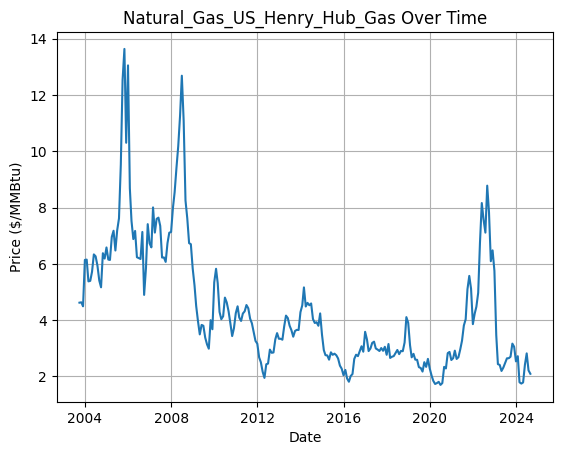

In [ ]:
#time series plot for target variable
plt.plot(combined_data.index, combined_data[target_variable])
plt.title(f'{target_variable} Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($/MMBtu)')
plt.grid(True)

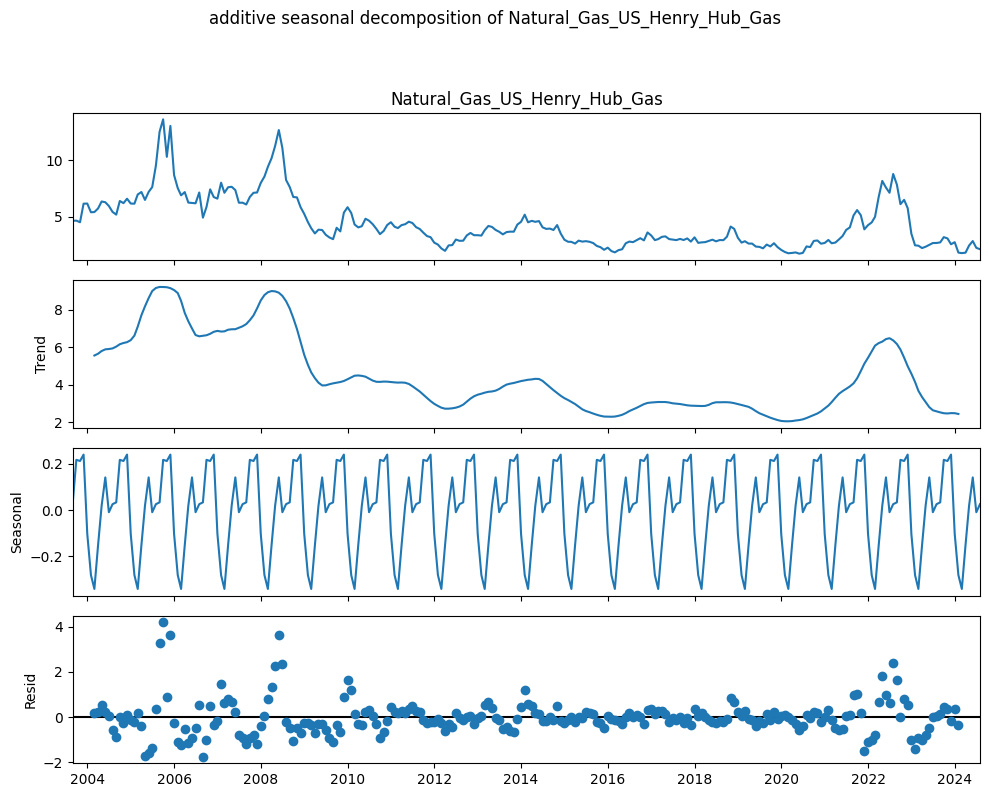

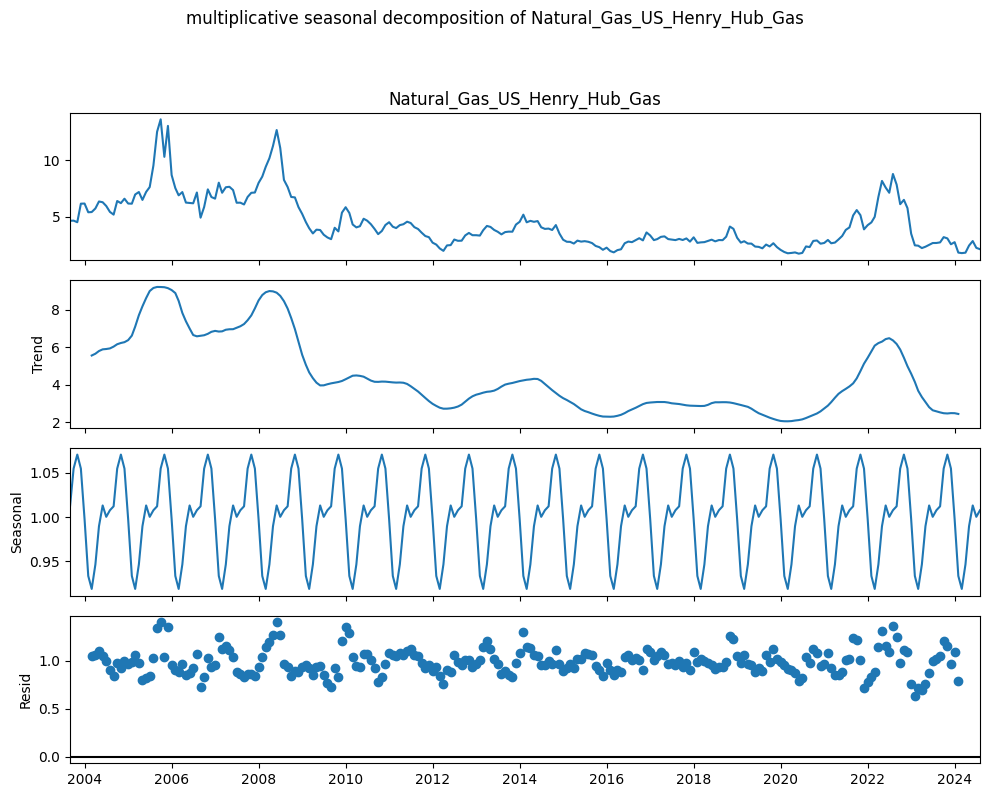

In [ ]:
monthly_data = combined_data[target_variable].resample("MS").mean().dropna()
if len(monthly_data) >= 24:
    try:
        decomposition = seasonal_decompose(monthly_data, model='additive', period=12)
        fig_decomp = decomposition.plot()
        fig_decomp.set_size_inches(10, 8)
        fig_decomp.suptitle(f"additive seasonal decomposition of Natural_Gas_US_Henry_Hub_Gas", y=1.02)
        plt.tight_layout(rect=[0, 0.03, 1, 0.98])
        plt.show()
        plt.close()

        decomposition_mult = seasonal_decompose(monthly_data, model='multiplicative', period=12)
        fig_mult = decomposition_mult.plot()
        fig_mult.set_size_inches(10, 8)
        fig_mult.suptitle(f"multiplicative seasonal decomposition of Natural_Gas_US_Henry_Hub_Gas", y=1.02)
        plt.tight_layout(rect=[0, 0.03, 1, 0.98])
        plt.show()
        plt.close()

    except Exception as e:
        print(f"error in decomposition: {e}")
else:
    print("not enough data for decomposition which requires at least 24 months")

In [ ]:
# variables for year-over-year and month-over-month comparisons
monthly_data_df = monthly_data.to_frame(name=target_variable)
monthly_data_df["year"] = monthly_data_df.index.year
monthly_data_df["month"] = monthly_data_df.index.month

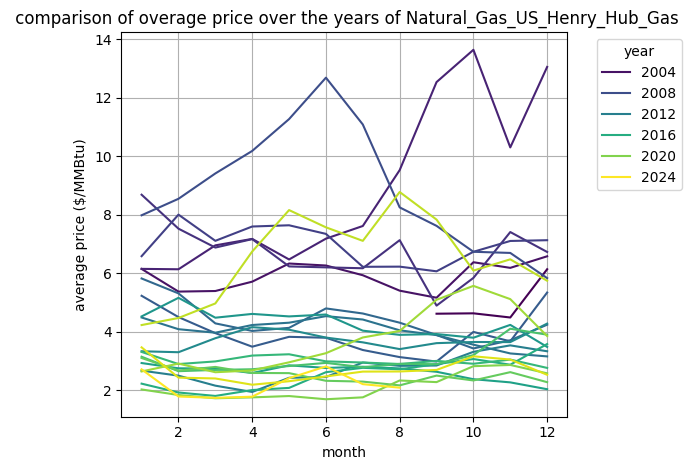

In [ ]:
# comparison of average price over years
sns.lineplot(data=monthly_data_df, x="month", y=target_variable, hue="year", palette="viridis")
plt.title(f" comparison of overage price over the years of {target_variable}")
plt.xlabel("month")
plt.ylabel("average price ($/MMBtu)")
plt.legend(title="year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

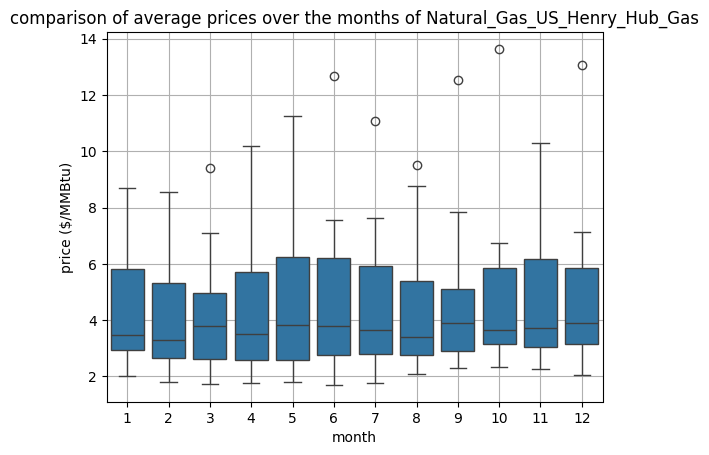

In [ ]:
#comparison of average prices over the months
sns.boxplot(data=monthly_data_df, x="month", y=target_variable)
plt.title(f"comparison of average prices over the months of {target_variable}")
plt.xlabel("month")
plt.ylabel("price ($/MMBtu)")
plt.grid(True)


In [ ]:
#correlations between the target variable and all features
numeric_combined_data = combined_data.select_dtypes(include=np.number)
correlations = numeric_combined_data.corr()[target_variable].sort_values(ascending=False)
print(correlations)

Natural_Gas_US_Henry_Hub_Gas                 1.000000
BCOMCL_INDX                                  0.791818
Natural_Gas_Rotary_Rig_Count_USA             0.729366
BCOMNG_INDX                                  0.671575
Kilian_Global_Economy_Index_WORLD            0.664946
                                               ...   
Electricity_Price_USA                       -0.411055
CPI_Index_Seasonally_Adjusted_USA           -0.472752
Total_Natural_Gas_Marketed_Production_USA   -0.520083
BCOMGC_INDX                                 -0.600296
CLI_Comp_Construction_Production_CHN        -0.699424
Name: Natural_Gas_US_Henry_Hub_Gas, Length: 113, dtype: float64


BCOMCL_INDX                             0.791818
Natural_Gas_Rotary_Rig_Count_USA        0.729366
BCOMNG_INDX                             0.671575
Kilian_Global_Economy_Index_WORLD       0.664946
Natural_Gas_Imports_USA                 0.650500
Natural_Gas_Imports_From_Canada_USA     0.603432
NM_PMI_Comp_Intermediate_Input_Price    0.541168
Crude_Steel_Accumulated_YoY             0.521004
PPI_Mining_Sector_USA                   0.494874
CLI_Comp_Orders_USA                     0.421288
Name: Natural_Gas_US_Henry_Hub_Gas, dtype: float64
GSPC_INDX                                   -0.377508
USDEUR_FOREX                                -0.384940
IXIC_INDX                                   -0.391057
Services_PMI                                -0.396056
DJI_INDX                                    -0.408493
Electricity_Price_USA                       -0.411055
CPI_Index_Seasonally_Adjusted_USA           -0.472752
Total_Natural_Gas_Marketed_Production_USA   -0.520083
BCOMGC_INDX                

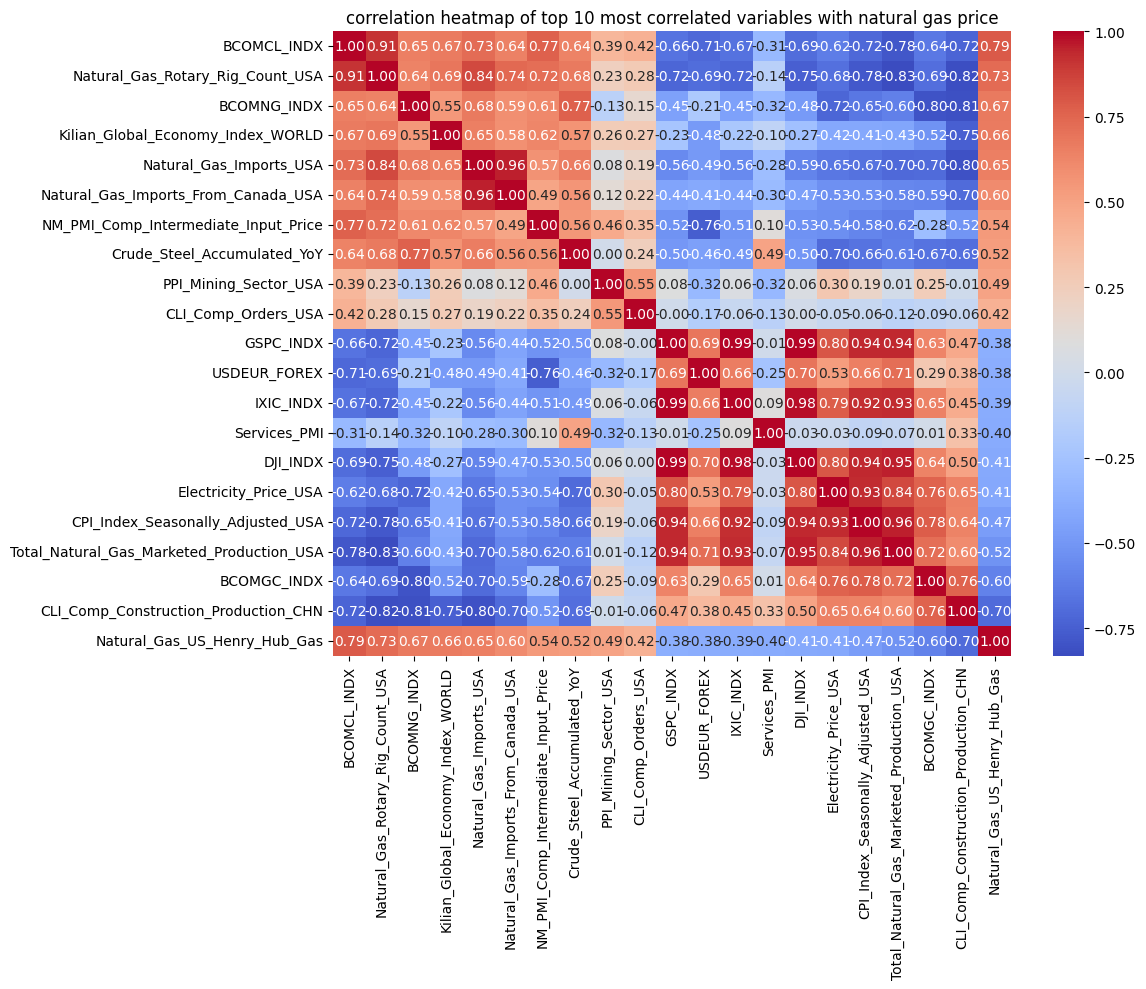

In [ ]:
#heatmap for the most important features

#top 10 positively/nagitively correlated values
top_positive_correlations = correlations[1:11]
top_negative_correlations = correlations[-10:]

print(top_positive_correlations)
print(top_negative_correlations)


important_features = pd.concat([top_positive_correlations, top_negative_correlations]).index.tolist()
important_features.append(target_variable)

correlation_matrix = combined_data[important_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("correlation heatmap of top 10 most correlated variables with natural gas price")
plt.tight_layout()

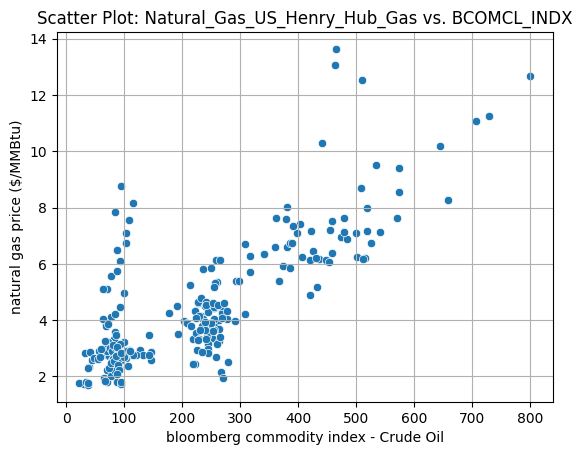

In [ ]:
#scatter plots for important relationships
#identified #1: Natural Gas Price vs. BCOMCL_INDX (positive)
sns.scatterplot(data=combined_data, x="BCOMCL_INDX", y=target_variable)
plt.title(f"Scatter Plot: {target_variable} vs. BCOMCL_INDX")
plt.xlabel("bloomberg commodity index - Crude Oil")
plt.ylabel("natural gas price ($/MMBtu)")
plt.grid(True)


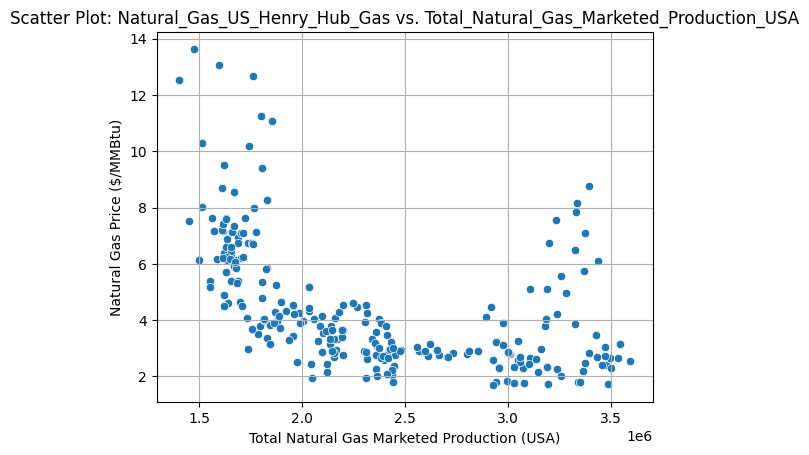

In [ ]:
#identified #2: Natural Gas Price vs. Total_Natural_Gas_Marketed_Production_USA (negative)
sns.scatterplot(data=combined_data, x="Total_Natural_Gas_Marketed_Production_USA", y=target_variable)
plt.title(f"Scatter Plot: {target_variable} vs. Total_Natural_Gas_Marketed_Production_USA")
plt.xlabel("Total Natural Gas Marketed Production (USA)")
plt.ylabel("Natural Gas Price ($/MMBtu)")
plt.grid(True)


Feature Creation

In [ ]:
class GasPriceFeatureEngineer:
    def __init__(self, target_column='Natural_Gas_US_Henry_Hub_Gas'):
        self.target_column = target_column
        self.feature_selector = None
        self.selected_features = None

    def add_time_features(self, df):
        df = df.copy()
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
            df = df.set_index('date')

        df['hour'] = df.index.hour if hasattr(df.index, 'hour') else 0
        df['dayofweek'] = df.index.dayofweek
        df['quarter'] = df.index.quarter
        df['month'] = df.index.month
        df['year'] = df.index.year
        df['dayofyear'] = df.index.dayofyear
        df['dayofmonth'] = df.index.day
        df['weekofyear'] = df.index.isocalendar().week

        df['is_winter'] = df['month'].isin([12, 1, 2]).astype(int)
        df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)
        df['is_heating_season'] = df['month'].isin([10, 11, 12, 1, 2, 3]).astype(int)
        df['is_cooling_season'] = df['month'].isin([5, 6, 7, 8, 9]).astype(int)

        df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
        df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
        df['quarter_sin'] = np.sin(2 * np.pi * df['quarter'] / 4)
        df['quarter_cos'] = np.cos(2 * np.pi * df['quarter'] / 4)
        df['dayofyear_sin'] = np.sin(2 * np.pi * df['dayofyear'] / 365)
        df['dayofyear_cos'] = np.cos(2 * np.pi * df['dayofyear'] / 365)

        return df

    def add_price_features(self, df):
        df = df.copy()

        if self.target_column not in df.columns:
            return df

        feature_count = 0

        for lag in [1, 2, 3, 6, 12]:
            df[f'gas_lag_{lag}'] = df[self.target_column].shift(lag)
            feature_count += 1

        for window in [3, 6, 12]:
            df[f'gas_ma_{window}'] = df[self.target_column].rolling(window).mean()
            df[f'gas_std_{window}'] = df[self.target_column].rolling(window).std()
            df[f'gas_min_{window}'] = df[self.target_column].rolling(window).min()
            df[f'gas_max_{window}'] = df[self.target_column].rolling(window).max()
            feature_count += 4

        df['momentum_3m'] = df[self.target_column] / df['gas_lag_3'] - 1
        df['momentum_6m'] = df[self.target_column] / df['gas_lag_6'] - 1
        df['momentum_12m'] = df[self.target_column] / df['gas_lag_12'] - 1
        feature_count += 3

        df['volatility_3m'] = df[self.target_column].rolling(3).std() / df[self.target_column].rolling(3).mean()
        df['volatility_6m'] = df[self.target_column].rolling(6).std() / df[self.target_column].rolling(6).mean()
        feature_count += 2

        df['price_vs_ma_3m'] = df[self.target_column] / df['gas_ma_3'] - 1
        df['price_vs_ma_6m'] = df[self.target_column] / df['gas_ma_6'] - 1
        df['price_vs_ma_12m'] = df[self.target_column] / df['gas_ma_12'] - 1
        feature_count += 3

        return df

    def add_energy_features(self, df):
        df = df.copy()
        feature_count = 0
        oil_columns = ['Brent_Crude_Oil', 'WTI_Crude_Oil']
        for col in oil_columns:
            if col in df.columns:
                df[f'{col}_gas_ratio'] = df[col] / (df[self.target_column] + 1e-8)
                df[f'{col}_momentum_3m'] = df[col] / df[col].shift(3) - 1
                df[f'{col}_momentum_6m'] = df[col] / df[col].shift(6) - 1
                df[f'{col}_volatility_3m'] = df[col].rolling(3).std() / df[col].rolling(3).mean()
                feature_count += 4

        supply_demand_columns = [
            'Natural_Gas_Imports_From_Canada_USA',
            'Natural_Gas_Imports_USA',
            'Natural_Gas_Rotary_Rig_Count_USA',
            'Natural_Gas_Total_Consumption_USA',
            'Total_Natural_Gas_Marketed_Production_USA',
            'Total_Natural_Gas_Underground_Storage_Volume_USA'
        ]

        for col in supply_demand_columns:
            if col in df.columns:
                df[f'{col}_yoy'] = df[col] / df[col].shift(12) - 1
                df[f'{col}_3m_change'] = df[col] / df[col].shift(3) - 1
                df[f'{col}_seasonal_adj'] = df[col] / df[col].shift(12)
                feature_count += 3

        if 'Total_Natural_Gas_Underground_Storage_Volume_USA' in df.columns:
            storage_col = 'Total_Natural_Gas_Underground_Storage_Volume_USA'
            df['storage_5yr_avg'] = df[storage_col].rolling(60, min_periods=12).mean()
            df['storage_vs_5yr_avg'] = df[storage_col] / df['storage_5yr_avg'] - 1
            df['storage_change'] = df[storage_col].diff()
            df['storage_change_3m'] = df[storage_col].diff(3)
            feature_count += 4

        return df

    def add_economic_features(self, df):
        df = df.copy()

        feature_count = 0

        if 'Fed_Fund_Effective_USA' in df.columns:
            fed_rate = 'Fed_Fund_Effective_USA'
            df[f'{fed_rate}_change_3m'] = df[fed_rate].diff(3)
            df[f'{fed_rate}_change_6m'] = df[fed_rate].diff(6)
            df[f'{fed_rate}_trend'] = df[fed_rate].rolling(6).apply(lambda x: np.polyfit(range(len(x)), x, 1)[0] if len(x) == 6 else 0)
            feature_count += 3

        cpi_columns = [col for col in df.columns if 'CPI' in col]
        for col in cpi_columns:
            if col in df.columns:
                df[f'{col}_inflation'] = df[col] / df[col].shift(12) - 1
                df[f'{col}_momentum'] = df[col].diff(3)
                feature_count += 2

        if 'DXY_INDX' in df.columns:
            dxy = 'DXY_INDX'
            df[f'{dxy}_momentum_3m'] = df[dxy] / df[dxy].shift(3) - 1
            df[f'{dxy}_momentum_6m'] = df[dxy] / df[dxy].shift(6) - 1
            df[f'{dxy}_volatility'] = df[dxy].rolling(6).std()
            feature_count += 3

        stock_indices = ['DJI_INDX', 'GSPC_INDX', 'IXIC_INDX']
        for idx in stock_indices:
            if idx in df.columns:
                df[f'{idx}_momentum_3m'] = df[idx] / df[idx].shift(3) - 1
                df[f'{idx}_volatility_3m'] = df[idx].rolling(3).std() / df[idx].rolling(3).mean()
                feature_count += 2

        return df

    def add_weather_features(self, df):
        df = df.copy()
        feature_count = 0

        temp_columns = ['high_temperature', 'low_temperature']
        for col in temp_columns:
            if col in df.columns:
                df[f'{col}_seasonal_avg'] = df.groupby('month')[col].transform(lambda x: x.rolling(36, min_periods=12).mean())
                df[f'{col}_anomaly'] = df[col] - df[f'{col}_seasonal_avg']
                feature_count += 2

                if col == 'high_temperature':
                    df['cooling_degree_days'] = np.maximum(df[col] - 65, 0)
                    feature_count += 1
                if col == 'low_temperature':
                    df['heating_degree_days'] = np.maximum(65 - df[col], 0)
                    feature_count += 1

        return df

    def create_all_features(self, df):

        df = self.add_time_features(df)
        df = self.add_price_features(df)
        df = self.add_energy_features(df)
        df = self.add_economic_features(df)
        df = self.add_weather_features(df)

        return df

    def clean_and_prepare_data(self, df):


        numeric_columns = df.select_dtypes(include=[np.number]).columns
        df_clean = df[numeric_columns].copy()

        df_clean = df_clean.replace([np.inf, -np.inf], np.nan)

        df_clean = df_clean.ffill().bfill()

        for col in df_clean.columns:
            if df_clean[col].isnull().any():
                df_clean[col] = df_clean[col].fillna(df_clean[col].median())

        df_clean = df_clean.fillna(0)


        return df_clean

    def select_best_features(self, X, y, k=50):

        selector = SelectKBest(score_func=mutual_info_regression, k=min(k, X.shape[1]))
        X_selected = selector.fit_transform(X, y)
        selected_features = X.columns[selector.get_support()].tolist()

        self.feature_selector = selector
        self.selected_features = selected_features

        return X_selected, selected_features

def main():

    df = pd.read_csv("henry_hub_gas_price_features.csv")

    target_column = 'Natural_Gas_US_Henry_Hub_Gas'
    engineer = GasPriceFeatureEngineer(target_column=target_column)


    df_with_features = engineer.create_all_features(df)

    df_clean = engineer.clean_and_prepare_data(df_with_features)


    if target_column in df_clean.columns:
        y = df_clean[target_column]
        X = df_clean.drop(columns=[target_column])

    else:
        return


    X_selected, selected_features = engineer.select_best_features(X, y, k=50)


    X_selected_df = pd.DataFrame(X_selected, columns=selected_features, index=X.index)
    final_dataset = pd.concat([X_selected_df, y], axis=1)



    final_dataset.to_csv('features_ready_for_training.csv')

    with open('selected_features_list.txt', 'w') as f:
        f.write("Selected Features for Natural Gas Price Forecasting\n")
        f.write("=" * 50 + "\n\n")
        for i, feature in enumerate(selected_features, 1):
            f.write(f"{i:2d}. {feature}\n")


if __name__ == "__main__":
    main()




Creating visualizations...


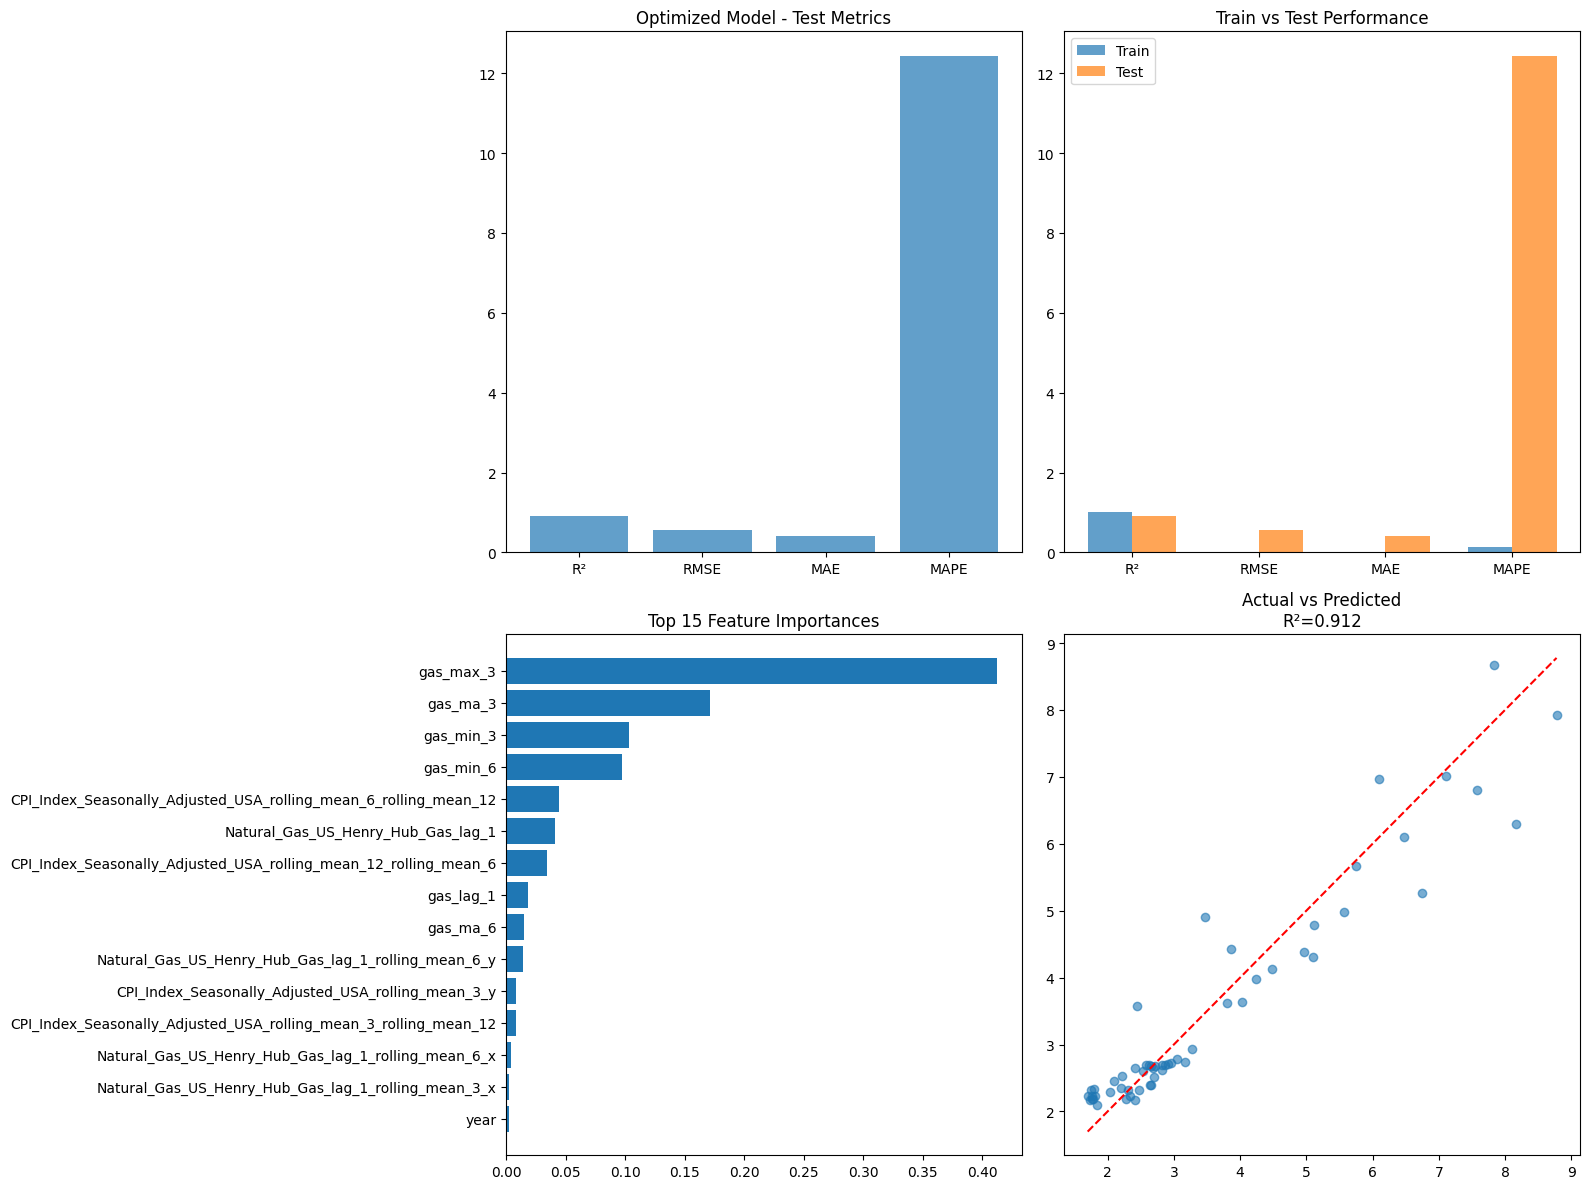

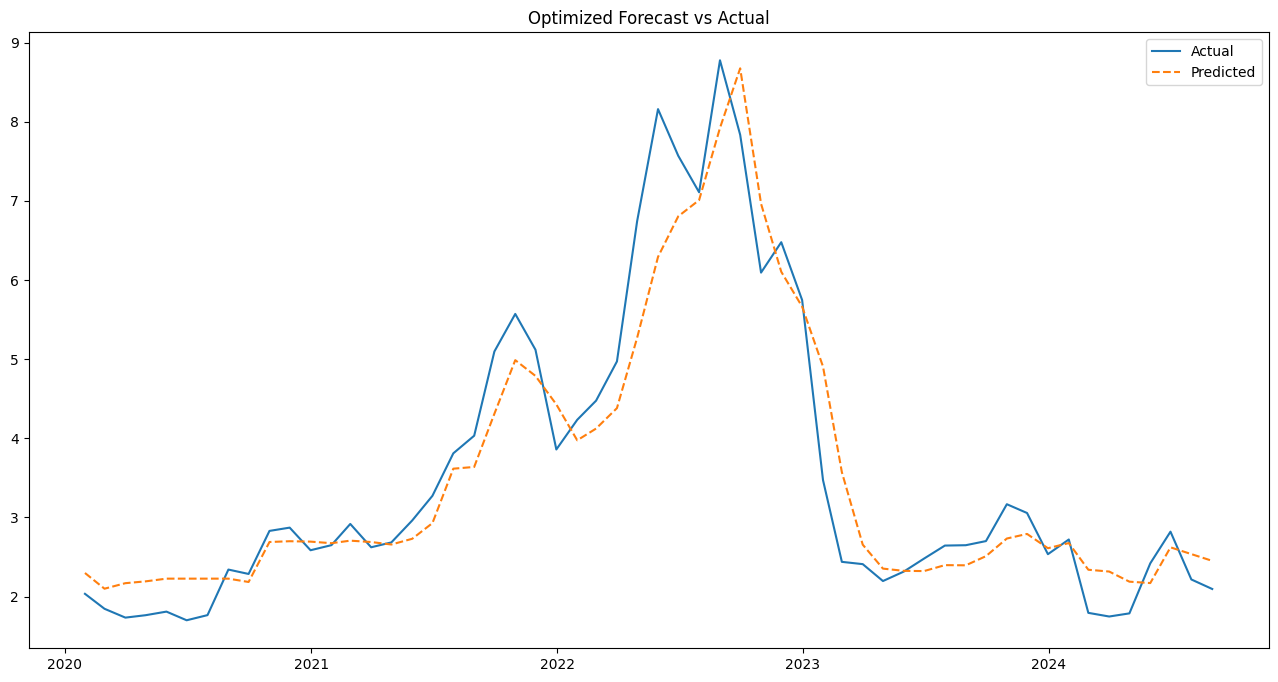


Final Test Metrics for Optimized:
  R²   : 0.9117
  RMSE : 0.5542 $/MMBtu
  MAE  : 0.4090 $/MMBtu
  MAPE : 12.43%


In [ ]:



class GasPriceModelTrainer:
    def __init__(self):
        self.models = {}
        self.results = {}
        self.best_model = None
        self.best_model_name = None

    def load_feature_data(self, filepath='features_ready_for_training.csv'):
        df = pd.read_csv(filepath, index_col=0, parse_dates=True)
        return df

    def create_train_test_split(
        self,
        df,
        target_column='Natural_Gas_US_Henry_Hub_Gas',
        train_end_date='2019-12-31'
    ):
        y = df[target_column]
        X = df.drop(columns=[target_column])

        X_train = X[X.index <= train_end_date]
        y_train = y[y.index <= train_end_date]
        X_test  = X[X.index > train_end_date]
        y_test  = y[y.index > train_end_date]

        return X_train, X_test, y_train, y_test

    def define_model_configurations(self):
        return {
            'Optimized': {
                'objective': 'reg:squarederror',
                'n_estimators': 800,
                'max_depth': 4,
                'learning_rate': 0.08,
                'subsample': 0.75,
                'colsample_bytree': 0.75,
                'reg_alpha': 0.05,
                'reg_lambda': 0.5,
                'random_state': 42,
                'n_jobs': -1
            }
        }

    def train_and_evaluate_models(
        self, X_train, X_test, y_train, y_test, configs
    ):
        for name, config in configs.items():
            model = xgb.XGBRegressor(**config)
            model.fit(X_train, y_train)

            y_train_pred = model.predict(X_train)
            y_test_pred  = model.predict(X_test)

            train_metrics = {
                'mae':  mean_absolute_error(y_train, y_train_pred),
                'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
                'r2':   r2_score(y_train, y_train_pred),
                'mape': mean_absolute_percentage_error(y_train, y_train_pred) * 100
            }

            test_metrics = {
                'mae':  mean_absolute_error(y_test, y_test_pred),
                'rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
                'r2':   r2_score(y_test, y_test_pred),
                'mape': mean_absolute_percentage_error(y_test, y_test_pred) * 100
            }

            self.results[name] = {
                'train': train_metrics,
                'test':  test_metrics,
                'train_predictions': y_train_pred,
                'test_predictions':  y_test_pred,
                'config': config
            }
            self.models[name] = model

    def save_models_and_results(self, X_train):
        joblib.dump(self.best_model, 'best_xgboost_model.pkl')
        for name, model in self.models.items():
            joblib.dump(model, f'xgboost_model_{name.lower()}.pkl')

        feature_importances = pd.DataFrame({
            'feature': X_train.columns,
            'importance': self.best_model.feature_importances_
        }).sort_values('importance', ascending=False)

        feature_importances.to_csv('feature_importances_best_model.csv', index=False)
        return feature_importances

    def create_visualizations(self, X_test, y_test, feature_importances):
        print("\nCreating visualizations...")

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        name = self.best_model_name
        tm = self.results[name]['train']
        vm = self.results[name]['test']

        metric_names  = ['R²', 'RMSE', 'MAE', 'MAPE']
        metric_values = [vm['r2'], vm['rmse'], vm['mae'], vm['mape']]
        axes[0, 0].bar(metric_names, metric_values, alpha=0.7)
        axes[0, 0].set_title(f'{name} Model - Test Metrics')

        train_vals = [tm['r2'], tm['rmse'], tm['mae'], tm['mape']]
        test_vals  = [vm['r2'], vm['rmse'], vm['mae'], vm['mape']]
        x = np.arange(len(metric_names))
        width = 0.35
        axes[0,1].bar(x-width/2, train_vals, width, label='Train', alpha=0.7)
        axes[0,1].bar(x+width/2, test_vals,  width, label='Test',  alpha=0.7)
        axes[0,1].set_xticks(x)
        axes[0,1].set_xticklabels(metric_names)
        axes[0,1].legend()
        axes[0,1].set_title('Train vs Test Performance')

        top15 = feature_importances.head(15)
        axes[1,0].barh(top15['feature'], top15['importance'])
        axes[1,0].invert_yaxis()
        axes[1,0].set_title('Top 15 Feature Importances')

        y_pred = self.results[name]['test_predictions']
        axes[1,1].scatter(y_test, y_pred, alpha=0.6)
        axes[1,1].plot([y_test.min(), y_test.max()],
                       [y_test.min(), y_test.max()],
                       'r--')
        axes[1,1].set_title(f'Actual vs Predicted\nR²={vm["r2"]:.3f}')

        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(16,8))
        plt.plot(y_test.index, y_test,  label='Actual')
        plt.plot(y_test.index, y_pred,  label='Predicted', linestyle='--')
        plt.title(f'{name} Forecast vs Actual')
        plt.legend()
        plt.show()

def main():
    trainer = GasPriceModelTrainer()
    df = trainer.load_feature_data()

    X_train, X_test, y_train, y_test = trainer.create_train_test_split(df)
    configs = trainer.define_model_configurations()

    trainer.train_and_evaluate_models(X_train, X_test, y_train, y_test, configs)

    trainer.best_model_name = 'Optimized'
    trainer.best_model      = trainer.models['Optimized']

    fi = trainer.save_models_and_results(X_train)
    trainer.create_visualizations(X_test, y_test, fi)

    tm = trainer.results[trainer.best_model_name]['test']
    print(f"\nFinal Test Metrics for {trainer.best_model_name}:")
    print(f"  R²   : {tm['r2']:.4f}")
    print(f"  RMSE : {tm['rmse']:.4f} $/MMBtu")
    print(f"  MAE  : {tm['mae']:.4f} $/MMBtu")
    print(f"  MAPE : {tm['mape']:.2f}%")

if __name__ == "__main__":
    main()


Prediction for upcoming months

          date    pred_1    pred_2    pred_3
0   2020-09-30  2.099015  2.127188  2.127188
1   2020-10-31  2.450057  2.477195  2.476363
2   2020-11-30  2.657191  2.679972  2.687260
3   2020-12-31  2.689985  2.678419  2.683184
4   2021-01-31  2.662148  2.662148  2.662148
5   2021-02-28  2.676035  2.697380  2.691163
6   2021-03-31  2.709875  2.709155  2.709155
7   2021-04-30  2.675085  2.667797  2.667797
8   2021-05-31  2.676563  2.734562  2.729286
9   2021-06-30  2.818297  2.941380  2.890292
10  2021-07-31  3.278389  3.382205  3.383306
11  2021-08-31  3.583169  3.656418  3.607648
12  2021-09-30  4.214357  4.295008  4.278819
13  2021-10-31  4.947196  4.891151  4.891151
14  2021-11-30  4.660157  4.645973  4.675689
15  2021-12-31  4.658276  4.481434  4.549508
16  2022-01-31  4.120523  4.094932  4.094932
17  2022-02-28  4.148540  4.155031  4.166099
18  2022-03-31  4.230022  4.374321  4.329199
19  2022-04-30  5.086221  5.273622  5.238935
20  2022-05-31  5.946352  6.385774  6.268729
21  2022-0

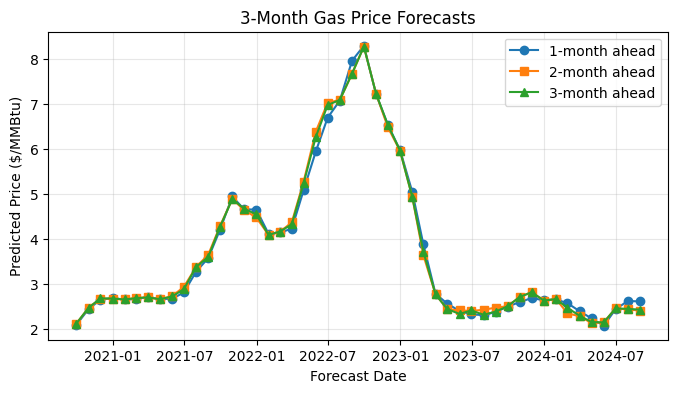

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import joblib
from datetime import timedelta
import matplotlib.pyplot as plt


class GasPricePredictor:
    def __init__(self,
                 model_path='best_xgboost_model.pkl',
                 features_path='features_ready_for_training.csv'):
        self.model = joblib.load(model_path)
        self.features_df = pd.read_csv(features_path,
                                       index_col=0,
                                       parse_dates=True)
        self.target_variable = 'Natural_Gas_US_Henry_Hub_Gas'

        self.model_features = self.model.get_booster().feature_names
        if not self.model_features:
            n_features = self.model.n_features_in_
            all_features = [
                c for c in self.features_df.columns
                if c != self.target_variable
            ]
            self.model_features = all_features[:n_features]

    def prepare_features_for_prediction(self, prediction_date):
        available = self.features_df[self.features_df.index <= prediction_date]
        if available.empty:
            raise ValueError(f"No data before {prediction_date}")
        latest = available.iloc[-1].copy()

        data = {}
        for f in self.model_features:
            data[f] = latest.get(f, 0)
        return pd.Series(data)

    def create_future_features(self, base_features, target_date,
                               last_known_price):
        feats = base_features.copy()

        if 'year' in feats.index:
            feats['year'] = target_date.year
        if 'month' in feats.index:
            feats['month'] = target_date.month
        if 'quarter' in feats.index:
            feats['quarter'] = (target_date.month - 1) // 3 + 1
        if 'month_sin' in feats.index:
            feats['month_sin'] = np.sin(2 * np.pi * target_date.month / 12)
        if 'month_cos' in feats.index:
            feats['month_cos'] = np.cos(2 * np.pi * target_date.month / 12)
        if 'is_winter' in feats.index:
            feats['is_winter'] = int(target_date.month in (12, 1, 2))
        if 'is_summer' in feats.index:
            feats['is_summer'] = int(target_date.month in (6, 7, 8))
        if 'is_heating_season' in feats.index:
            feats['is_heating_season'] = int(target_date.month in (11,12,1,2,3))

        lag_cols = [c for c in feats.index
                    if f"{self.target_variable}_lag_" in c]
        for lc in lag_cols:
            feats[lc] = last_known_price

        return feats

    def predict_three_months(self, prediction_date):
        if isinstance(prediction_date, str):
            prediction_date = pd.to_datetime(prediction_date)

        base = self.prepare_features_for_prediction(prediction_date)

        prior = self.features_df[self.features_df.index <= prediction_date]
        if self.target_variable in prior.columns:
            last_price = prior[self.target_variable].iloc[-1]
        else:
            last_price = 4.0

        preds = []
        for m in (1, 2, 3):
            year = prediction_date.year + ((prediction_date.month + m - 1) // 12)
            month = (prediction_date.month + m - 1) % 12 + 1
            first_next = pd.Timestamp(year=year, month=month, day=1) + timedelta(days=32)
            eom = first_next.replace(day=1) - timedelta(days=1)

            feats = self.create_future_features(base, eom, last_price)
            X = feats[self.model_features].values.reshape(1, -1)
            p = self.model.predict(X)[0]
            preds.append(p)
            last_price = p

        return preds
    def create_submission_file(self,
                               test_dates_file='data_test.csv',
                               output_file='submission.csv',
                               single_date=None):
        """
        If single_date is provided (string 'YYYY-MM-DD'), produce exactly one row.
        Otherwise read all dates from test_dates_file and loop.
        """
        rows = []

        if single_date:
            dates = [pd.to_datetime(single_date)]
        else:
            df = pd.read_csv(test_dates_file)
            dates = pd.to_datetime(df['date']).tolist()

        for d in dates:
            p1, p2, p3 = self.predict_three_months(d)
            rows.append({
                'date':   d.strftime('%Y-%m-%d'),
                'pred_1': p1,
                'pred_2': p2,
                'pred_3': p3
            })

        submission_df = pd.DataFrame(rows)
        submission_df.to_csv(output_file, index=False)
        return submission_df


def main():
    predictor = GasPricePredictor(
        model_path='best_xgboost_model.pkl',
        features_path='features_ready_for_training.csv'
    )

    submission_df = predictor.create_submission_file(
        test_dates_file='data_test.csv',
        output_file='submission.csv'
    )

    print(submission_df)

    dates = pd.to_datetime(submission_df['date'])
    plt.figure(figsize=(8,4))
    plt.plot(dates, submission_df['pred_1'], 'o-', label='1-month ahead')
    plt.plot(dates, submission_df['pred_2'], 's-', label='2-month ahead')
    plt.plot(dates, submission_df['pred_3'], '^-', label='3-month ahead')
    plt.title('3-Month Gas Price Forecasts')
    plt.xlabel('Forecast Date')
    plt.ylabel('Predicted Price ($/MMBtu)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


if __name__ == '__main__':
    main()
